# ***Data Analysis and Visualization using IPL Cricket data***

In this Python notebook, I have created visualizations using the IPL Cricket data like line plot, bar plot, pie chart and other visualizations based on Runs scored per over, top batsmen by runs, extras count, bowling economy rates. This project helps auction teams and prediction team to wisely choose their batsmen and bowler.

# Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data

In [ ]:
data= pd.read_csv('deliveries.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40750 entries, 0 to 40749
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          40750 non-null  int64  
 1   inning            40750 non-null  int64  
 2   batting_team      40750 non-null  object 
 3   bowling_team      40750 non-null  object 
 4   over              40750 non-null  int64  
 5   ball              40750 non-null  int64  
 6   batter            40750 non-null  object 
 7   bowler            40750 non-null  object 
 8   non_striker       40749 non-null  object 
 9   batsman_runs      40749 non-null  float64
 10  extra_runs        40749 non-null  float64
 11  total_runs        40749 non-null  float64
 12  extras_type       2467 non-null   object 
 13  is_wicket         40749 non-null  float64
 14  player_dismissed  2061 non-null   object 
 15  dismissal_kind    2061 non-null   object 
 16  fielder           1502 non-null   object

In [ ]:
data.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN


# Checking for missing values, removing duplicates

In [ ]:
missing_data = data.isnull().sum()
print(missing_data)

match_id                0
inning                  0
batting_team            0
bowling_team            0
over                    0
ball                    0
batter                  0
bowler                  0
non_striker             1
batsman_runs            1
extra_runs              1
total_runs              1
extras_type         38283
is_wicket               1
player_dismissed    38689
dismissal_kind      38689
fielder             39248
dtype: int64


In [ ]:
data['extras_type'].fillna('None', inplace=True)
data['player_dismissed'].fillna('None', inplace=True)
data['dismissal_kind'].fillna('None', inplace=True)
data['fielder'].fillna('None', inplace=True)


<ipython-input-9-2eb584b9b511>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['extras_type'].fillna('None', inplace=True)
<ipython-input-9-2eb584b9b511>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
# Removing duplicate rows
data = data.drop_duplicates()


In [ ]:
# Check unique values
print(data['batting_team'].unique())
print(data['bowling_team'].unique())


['Kolkata Knight Riders' 'Royal Challengers Bangalore'
 'Chennai Super Kings' 'Kings XI Punjab' 'Rajasthan Royals'
 'Delhi Daredevils' 'Mumbai Indians' 'Deccan Chargers']
['Royal Challengers Bangalore' 'Kolkata Knight Riders' 'Kings XI Punjab'
 'Chennai Super Kings' 'Delhi Daredevils' 'Rajasthan Royals'
 'Mumbai Indians' 'Deccan Chargers']


In [ ]:
#Team Mapping
team_mapping = {
    'Kolkata Knight Riders': 'KKR',
    'Chennai Super Kings': 'CSK',
    'Rajasthan Royals': 'RR',
    'Mumbai Indians': 'MI',
    'Delhi Capitals': 'DC',
    'Sunrisers Hyderabad': 'SRH',
    'Kings XI Punjab': 'KXIP',
    'Royal Challengers Bangalore': 'RCB',
    'Delhi Daredevils': 'DC',
    'Deccan Chargers': 'SRH',
    'Gujarat Lions': 'GT',
    'Rising Pune Supergiants': 'RPS',
    'Pune Warriors': 'RPS',
    'Kochi Tuskers Kerala': 'KKR',
    'Rising Pune Supergiant': 'RPS',
    'Gujarat Titans': 'GT',
    'Lucknow Super Giants': 'LSG'
}

data['batting_team']=data['batting_team'].replace(team_mapping)
data['bowling_team']=data['bowling_team'].replace(team_mapping)


# Runs scored per over

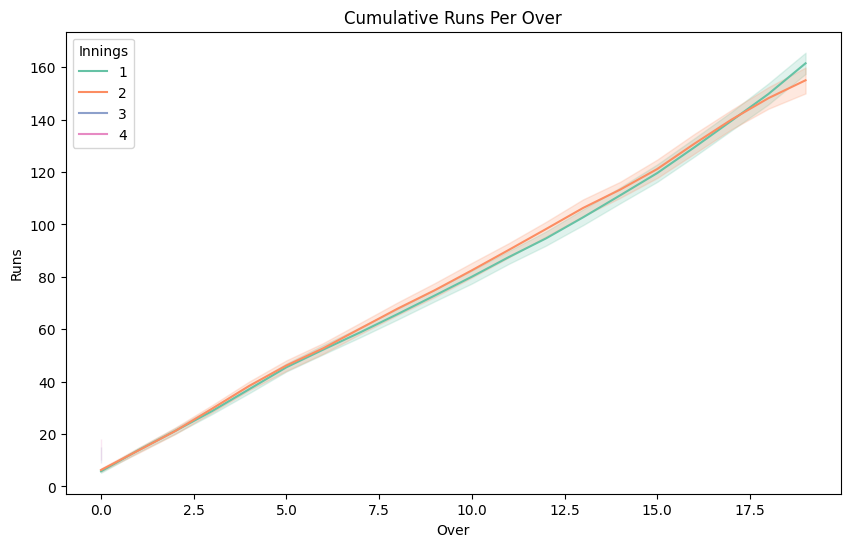

In [ ]:
plt.figure(figsize=(10,6))
cumulative_runs=data.groupby(['match_id','inning','over'])['total_runs'].sum().groupby(level=[0,1]).cumsum().reset_index()
sns.lineplot(x='over',y='total_runs',hue='inning',palette='Set2',data=cumulative_runs)
plt.title('Cumulative Runs Per Over')
plt.xlabel('Over')
plt.ylabel('Runs')
plt.legend(title='Innings')
plt.show()

# Top batsmen by Runs

<ipython-input-14-ca1a55dc0ad7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_batsmen,x='batsman_runs',y='batter',palette="husl")


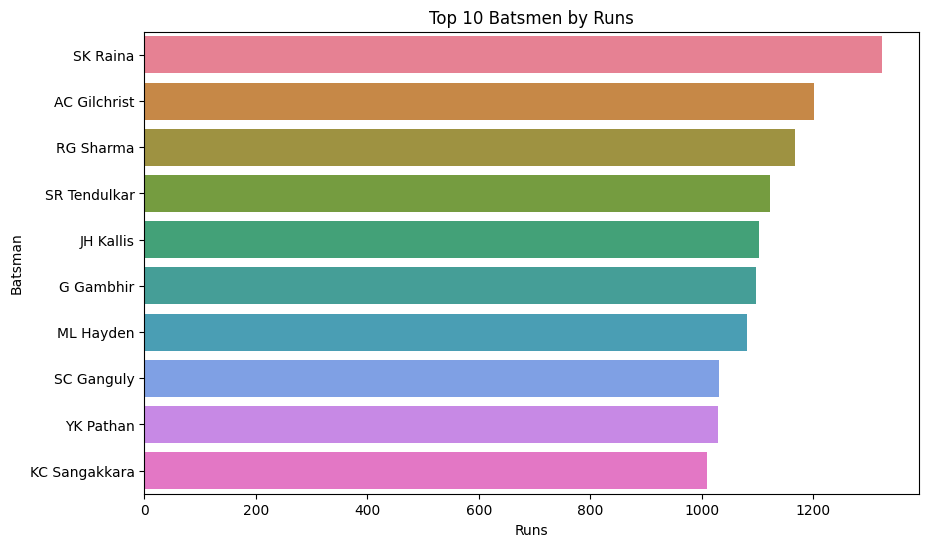

In [ ]:
top_batsmen=data.groupby('batter')['batsman_runs'].sum().nlargest(10).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=top_batsmen,x='batsman_runs',y='batter',palette="husl")
plt.title('Top 10 Batsmen by Runs')
plt.xlabel('Runs')
plt.ylabel('Batsman')
plt.show()


# Bowlers economy rate



<ipython-input-15-579f51c67fa7>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  economy_rate = data.groupby('bowler').apply(lambda x: x['total_runs'].sum() / (x['over'].nunique())).sort_values().head(10)


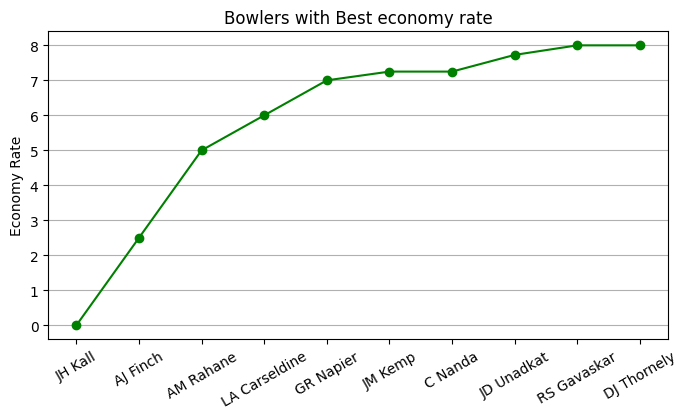

In [ ]:
economy_rate = data.groupby('bowler').apply(lambda x: x['total_runs'].sum() / (x['over'].nunique())).sort_values().head(10)

plt.figure(figsize=(8,4))
plt.plot(economy_rate.index, economy_rate.values, marker='o', linestyle='-', color='green')
plt.ylabel('Economy Rate')
plt.title('Bowlers with Best economy rate')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.show()

# Runs scored in first and second innings

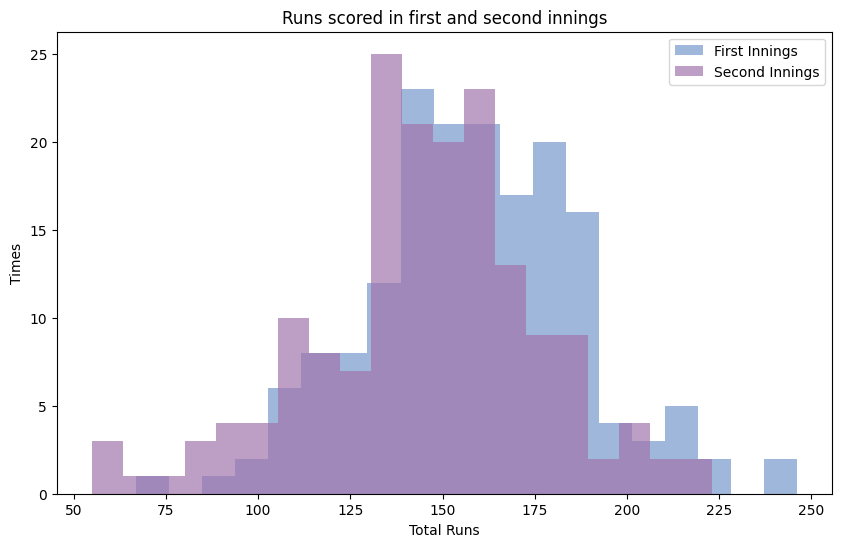

In [ ]:
innings_runs= data.groupby(['match_id','inning'])['total_runs'].sum().reset_index()

#Splitting the data by innings
first_innings=innings_runs[innings_runs['inning']==1]['total_runs']
second_innings=innings_runs[innings_runs['inning']==2]['total_runs']

plt.figure(figsize=(10,6))
plt.hist(first_innings,bins=20,alpha=0.7,color='#79C',label='First Innings')
plt.hist(second_innings,bins=20,alpha=0.7,color='#a275ac',label='Second Innings')
plt.xlabel('Total Runs')
plt.ylabel('Times')
plt.title('Runs scored in first and second innings')
plt.legend()
plt.show()

# Best Batting Partnership in IPL History

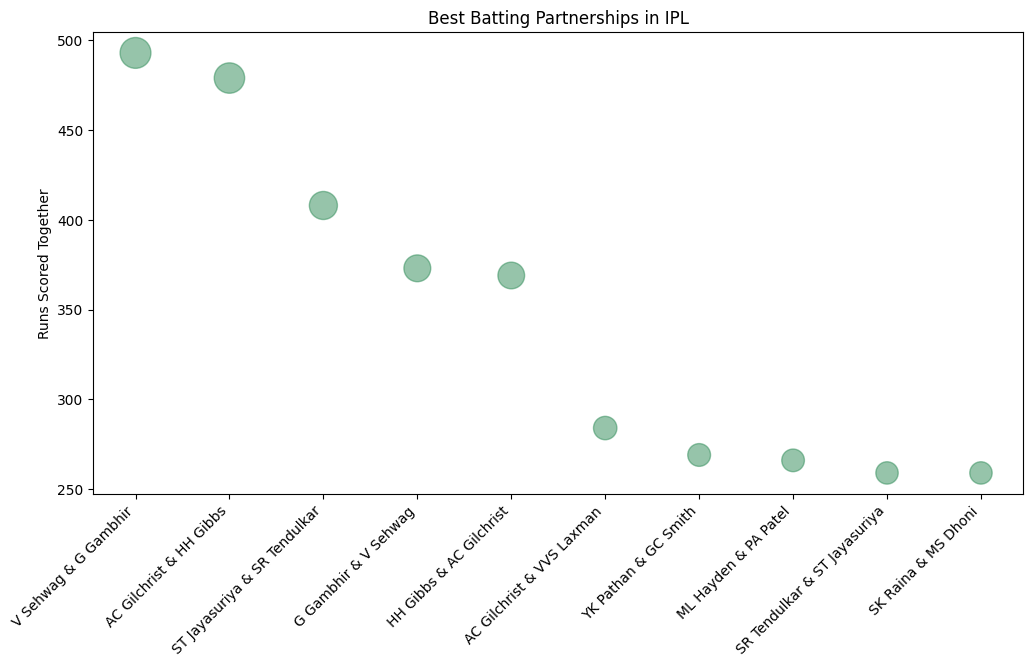

In [ ]:
# Best Batting Partnerships using 'batter' and 'non_striker'
partnerships = data.groupby(['batter', 'non_striker'])['batsman_runs'].sum().reset_index().sort_values(by='batsman_runs', ascending=False).head(10)

# Plot the bubble chart
plt.figure(figsize=(12, 6))
plt.scatter(partnerships['batter'] + ' & ' + partnerships['non_striker'], partnerships['batsman_runs'], s=partnerships['batsman_runs'], alpha=0.5, color='seagreen')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Runs Scored Together')
plt.title('Best Batting Partnerships in IPL')
plt.show()
